# CS 7646: Machine Learning for Trading
## Week 2 - 08/29/2022
### Lessons: 01-05 to 01-08

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
data_dir = "../data/"

## 01-05 Incomplete data

### Pristine data

What people think:
- Perfect data recorded minute by minute.
- No gaps or missing data points.

Reality:
- Data is an amalgamation.
- Not all stocks trade every day.

### Why data goes missing?

In [3]:
def symbol_to_path(symbol, base_dir=data_dir):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, f"{str(symbol)}.csv")


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')
    
    for symbol in symbols:
        df_temp = pd.read_csv(f"{symbol_to_path(symbol)}",
                              index_col='Date',
                              parse_dates=True,
                              usecols=['Date', 'Adj Close'],
                              na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)  # use default how='left'
        if symbol == 'SPY':
            df = df.dropna(subset=['SPY'])
        
    return df

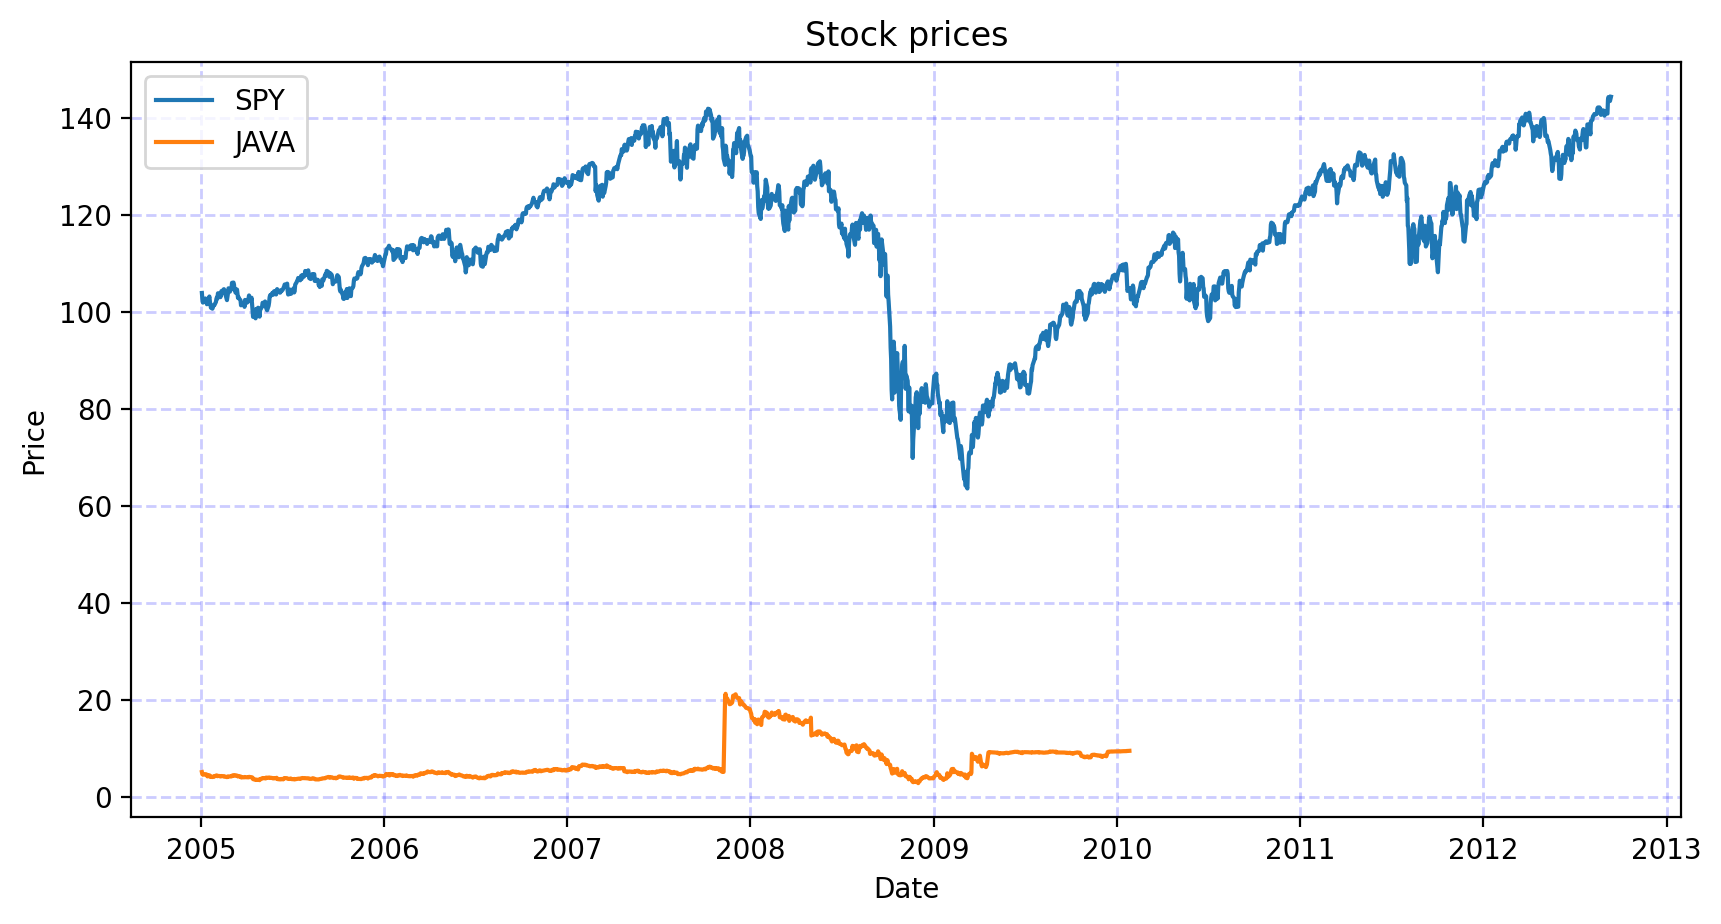

In [4]:
def plot_selected(df, columns, start_index, end_index):
    """PLot the desired columns over index values in the given range."""
    # Filter columns
    df = df[columns]
    
    # Slice by row range
    df = df[start_index:end_index]
    
    # Plot stock data
    plt.figure(figsize=(10,5), dpi=200)
    plt.plot(df)
    plt.grid(color='blue', linestyle='--', linewidth=1, alpha=0.2)
    plt.title("Stock prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend(df)
    plt.show()
    
    
def test_run():
    # Define a data range
    dates = pd.date_range('2005-01-01', '2012-12-31') # year 2010
    
    # Choose stock symbols to read
    symbols = ['SPY', 'JAVA']  # SPY will be added in get_data()
    
    # Get stock data
    df = get_data(symbols=symbols, dates=dates)
    
    # Slice and plot
    plot = plot_selected(df, symbols, '2005-01-01', '2012-12-31')
    return plot

test_run()

### Why this is bad - what can we do?
1. Fill forward from last previous known value.
2. Can't use interpolation since we would be giving information about the future (not allowed).
3. Fill backward after filling forward.

### Pandas fillna()
Fill forward missing values.
`df.fillna(method="ffill")`

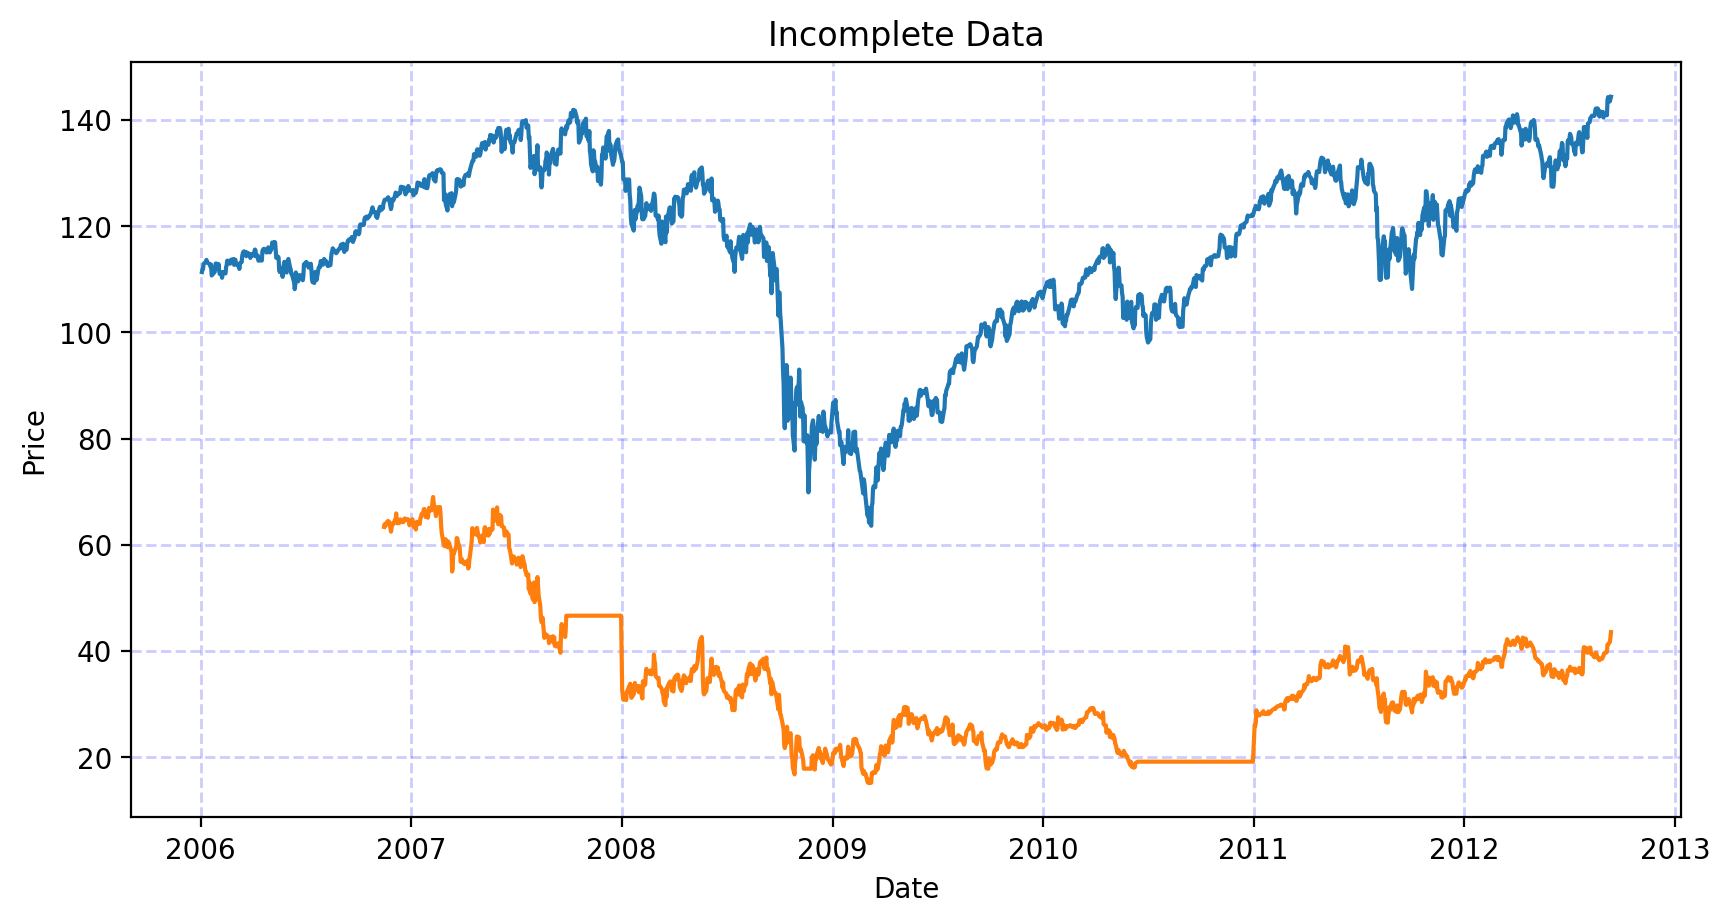

In [5]:
def plot_data(df):
    plt.figure(figsize=(10,5), dpi=200)
    plt.plot(df)
    plt.grid(color='blue', linestyle='--', linewidth=1, alpha=0.2)
    plt.title('Incomplete Data')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()


def test_run():
    # Define a data range
    start, end = '2005-12-31', '2014-12-07'
    dates = pd.date_range(start, end) # year 2010
    
    # Choose stock symbols to read
    symbols = ['SPY', 'FAKE2']  # SPY will be added in get_data()
    
    # Get stock data
    df = get_data(symbols=symbols, dates=dates)
    df.fillna(method="ffill", inplace=True)
    
    # Slice and plot
    plot = plot_data(df)
    return plot

test_run()

### Fill missing values

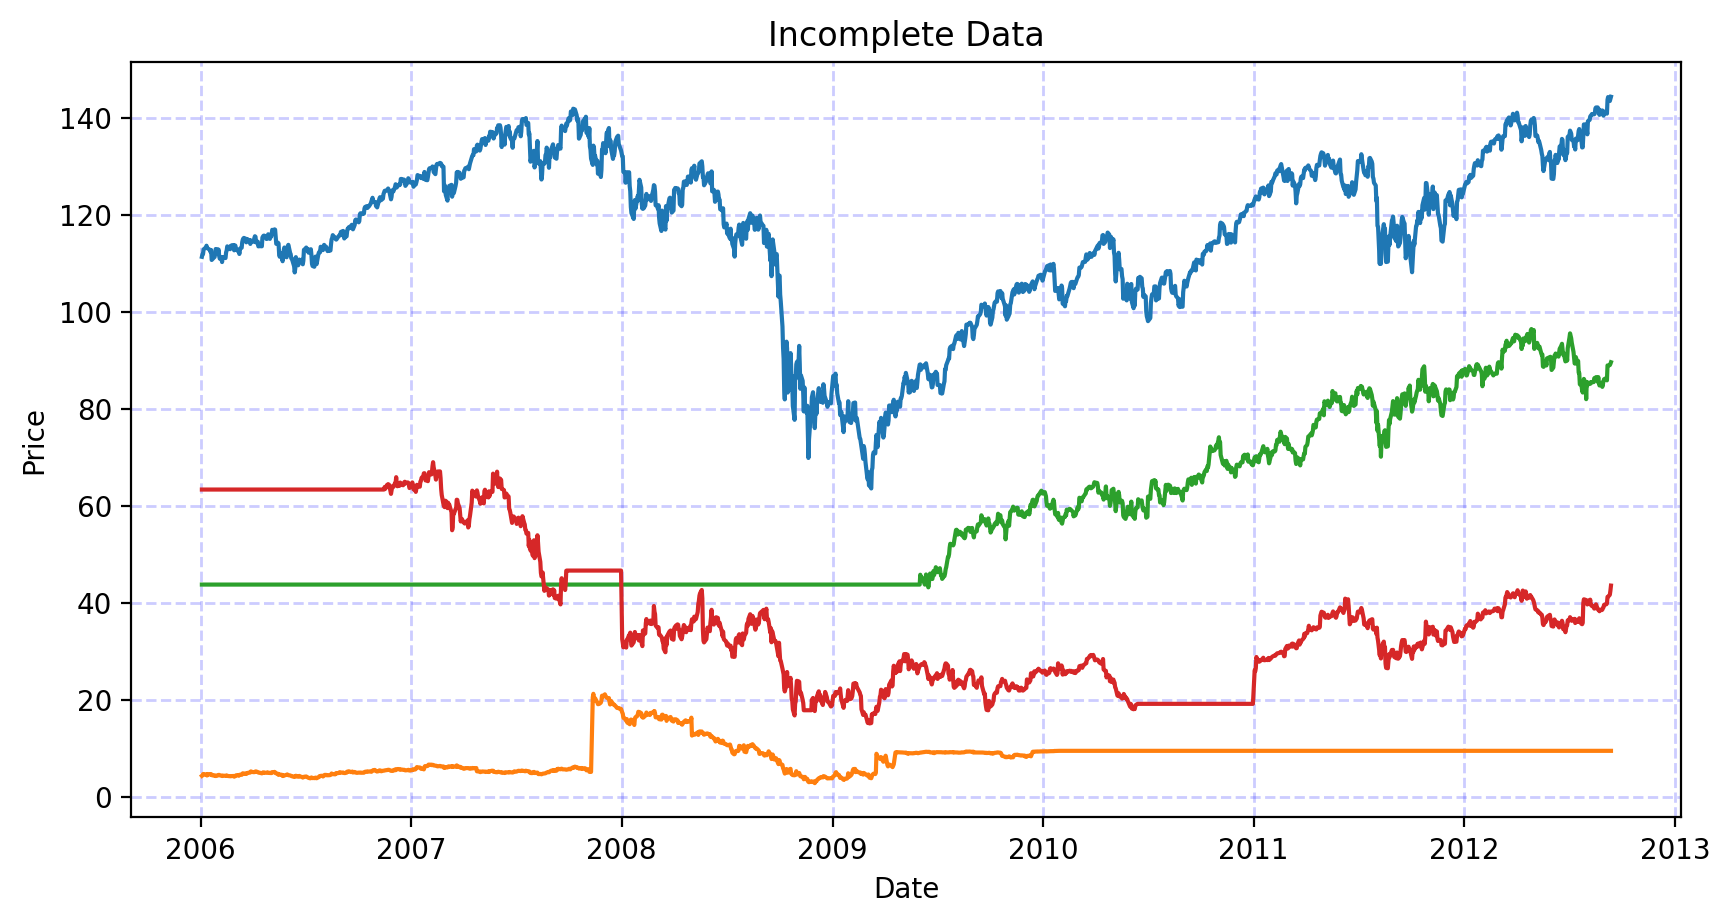

In [6]:
def test_run():
    # Define a data range
    start, end = '2005-12-31', '2014-12-07'
    dates = pd.date_range(start, end) # year 2010
    
    # Choose stock symbols to read
    symbols = ['JAVA', 'FAKE1', 'FAKE2']  # SPY will be added in get_data()
    
    # Get stock data
    df = get_data(symbols=symbols, dates=dates)
    df.fillna(method="ffill", inplace=True)
    df.fillna(method='bfill', inplace=True)
    
    # Slice and plot
    plot = plot_data(df)
    return plot

test_run()